In [250]:
from os import listdir
from os.path import isfile
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize

In [251]:
path = './data_signature/'

folders = listdir(path)
list_of_img = []
imglabels = {'170401076':'0', '150401006':'1', '150401043':'2', '160401002':'3', '160401027':'4', 
          '160401043':'5', '160401048':'6', '160401050':'7', '160401051':'8', '170401011':'9', 
          '170401012':'10', '170401025':'11', '170401070':'12', '170401073':'13'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '.png'
        else:
            imgpath = imgpath + 'test.png'

        img = plt.imread(imgpath)
        img = img[:,:,0]
        img = resize(img, (28,28))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

170401070
160401051
160401027
150401006
160401043
160401050
160401048
170401025
170401073
150401043
160401002
170401012
170401011
170401076


In [252]:
len(list_of_img)

420

In [253]:
X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [254]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

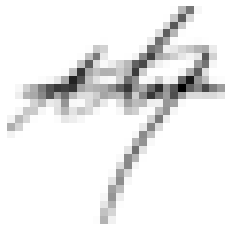

2


In [255]:
i = 290
plt.imshow(X[i].reshape(28,28), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [256]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((420, 784), (420,), ((14, 784), (14,)))

In [257]:
y

array(['12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '12', '12', '12',
       '12', '12', '12', '12', '12', '12', '12', '12', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8', '8',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7',
       '7', '7', '7', '7', '7', '7', '7', '7', '7', '7', '7

In [258]:
X = X / 255

In [259]:
X_test = X_test / 255

In [260]:
digits = 14

examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [261]:
digits = 14

examples = y_test.shape[0]

y_test = y_test.reshape(1, examples)

Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

In [262]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 420), (14, 420)), ((1, 14), (14, 14)))

In [263]:
m = 420
m_test = X.shape[0] - m

#X_train, X_test = X[:m].T, X[m:].T
#Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

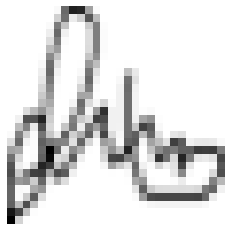

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [264]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [265]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [266]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [267]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  6.617526739476011
Epoch 100 cost:  2.637321950447861
Epoch 200 cost:  2.6299246241333236
Epoch 300 cost:  2.6225189610035073
Epoch 400 cost:  2.6150809145275344
Epoch 500 cost:  2.607586658735636
Epoch 600 cost:  2.6000125647195524
Epoch 700 cost:  2.5923351906443757
Epoch 800 cost:  2.5845312802393634
Epoch 900 cost:  2.5765777663508183
Epoch 1000 cost:  2.5684517779825593
Epoch 1100 cost:  2.5601306509257555
Epoch 1200 cost:  2.551591943342473
Epoch 1300 cost:  2.54281345841916
Epoch 1400 cost:  2.5337732764752934
Epoch 1500 cost:  2.5244497988086816
Epoch 1600 cost:  2.514821805225309
Epoch 1700 cost:  2.504868526765068
Epoch 1800 cost:  2.4945697346718894
Epoch 1900 cost:  2.4839058461810946
Final cost: 2.4729704851399896


In [268]:
from sklearn.metrics import classification_report, confusion_matrix

In [269]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 1 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         1
           4       0.00      0.00      0.00         0
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       0.00      0.00      0.00         0
           8       1.00      1.00      1.00         1
           9       1.00 

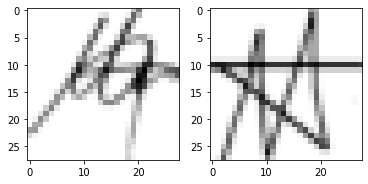

In [288]:

plt.subplot(1,2,1)
plt.imshow(X[:,91].reshape(28,28), cmap ='gray')
plt.subplot(1,2,2)
plt.imshow(X[:,200].reshape(28,28), cmap ='gray')
plt.show()

#### Benim imzamı doğru tanımış fakat yandaki imzayı benim imzam olarak tahmin etmiş. Veri setinin küçük olmasından ve resim boyutlarının 28x28 olmasından dolayı ve de imzaların birbirine biraz benzemesinden dolayı ikinci imzayı yanlış tahmin ettiğini düşünüyorum.
